In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# 一、随机森林回归
# 1. 数据加载
data = pd.read_csv('../data/train.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
# 2. 数据预处理（填充缺失值、标准化、独热编码）
# 数值数据
numeric_features = X.select_dtypes(include='number').columns
numeric_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean")),
    ("scaler",StandardScaler())
])

# 类别数据
categorical_features = X.select_dtypes(exclude='number').columns
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value="unknown")),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

# 组合预处理步骤
preprocessor = ColumnTransformer(
    transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [4]:
# 3. 创建机器学习工作流
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [5]:
# 4. 数据集分隔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 5. 使用工作流训练模型
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF'...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor())])

In [7]:
# 6. 模型预测
y_pred = pipeline.predict(X_test)

In [18]:
# 7. 模型评估
print(f"mean_squared_error = {mean_squared_error(y_test,y_pred)}")

mean_squared_error = 883499057.5055804


In [19]:
# 8. 预测并保存结果
test = pd.read_csv('../data/test.csv')
sample_submission = pd.read_csv('../data/sample_submission.csv')

test_pred = pipeline.predict(test)
sample_submission.iloc[:,-1] = test_pred

save_path = '../result/RFR_submission.csv'
sample_submission.to_csv(save_path, index=False)
print(f"预测结果已保存在{save_path}")

预测结果已保存在../result/RFR_submission.csv


In [20]:
# 二、神经网络
# 1. 数据加载
data = pd.read_csv('../data/train.csv')
X_test = pd.read_csv('../data/test.csv')
X_raw = data.iloc[:, :-1]
y = data.iloc[:, -1].values
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
# 2. 数据预处理（填充缺失值、标准化、独热编码）
# 数值数据
numeric_features = X_raw.select_dtypes(include='number').columns
numeric_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean")),
    ("scaler",StandardScaler())
])

# 类别数据
categorical_features = X_raw.select_dtypes(exclude='number').columns
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value="unknown")),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

# 组合预处理步骤
preprocessor = ColumnTransformer(
    transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

X = preprocessor.fit_transform(X_raw).toarray()
X_test = preprocessor.transform(X_test).toarray()

In [22]:
# 3. 数据集分隔
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(1168, 304) (1168,) (292, 304) (292,)


In [23]:
# 4. 神经网络定义
# 4.1 导入包并设置种子
import random
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [24]:
# 4.2 以类的方式定义超参数
class Argparse():
    def __init__(self):
        self.batch_size = 25
        self.epochs = 15
        self.lr = 0.01
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.X_train = X_train
        self.X_val = X_val
        self.y_train = y_train
        self.y_val = y_val
        self.X_test = X_test
        self.input_size = X.shape[1]
        self.hidden1_size = 64
        self.hidden2_size = 256
        self.hidden3_size = 128
        self.hidden4_size = 32
        self.output_size = 1
        self.modelpath = "../result/Net.pth"

args = Argparse()

In [25]:
# 4.3 定义模型
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(args.input_size,args.hidden1_size),
            nn.ReLU(True))
        self.layer2 = nn.Sequential(
            nn.Linear(args.hidden1_size,args.hidden2_size),
            nn.ReLU(True))
        self.layer3 = nn.Sequential(
            nn.Linear(args.hidden2_size,args.hidden3_size),
            nn.ReLU(True))
        self.layer4 = nn.Sequential(
            nn.Linear(args.hidden3_size,args.hidden4_size),
            nn.ReLU(True))
        self.layer5 = nn.Sequential(
            nn.Linear(args.hidden4_size,args.output_size))
        
    def forward(self,x):
        x1 = self.layer1(x)
        x2 = self.layer2(x1)
        x3 = self.layer3(x2)
        x4 = self.layer4(x3)
        output = self.layer5(x4).squeeze(1)
        return output

In [26]:
# 4.4 定义数据集
class Mydataset(Dataset):
    def __init__(self,flag="train"):
        self.flag = flag
        assert self.flag in ["train","val","test"], "not implemented"
        
        if self.flag == "train":
            self.data = args.X_train
            self.target = args.y_train
        elif self.flag == "val":
            self.data = args.X_val
            self.target = args.y_val
        elif self.flag == "test":
            self.data = args.X_test
            self.target = np.zeros(shape=(args.X_test.shape[0]))
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        data = torch.tensor(self.data[idx], dtype=torch.float32)
        target = torch.tensor(self.target[idx], dtype=torch.float32)
        return data, target

In [27]:
# 4.5 定义训练器
def trainer(modelpath=None):
    print("进入训练模式")
    train_dataset = Mydataset(flag="train")
    train_loader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True)
    val_dataset = Mydataset(flag="val")
    val_loader = DataLoader(val_dataset, batch_size=args.batch_size, shuffle=True)
    
    model = Net().to(args.device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)
    
    train_epochs_loss = []
    val_epochs_loss = []
    # print("完成前置")
    
    for epoch in range(args.epochs):
        # print("进入循环")
        model.train()
        train_loss, num_samples = 0, 0
        
        # train
        for X, y in train_loader:
            # print("顺利读入训练集", X.shape, y.shape)
            X, y = X.to(args.device), y.to(args.device)
            optimizer.zero_grad()
            y_pred = model(X)
            loss = criterion(y_pred, y)
            
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            num_samples += y.size(0)
        
        train_loss /= num_samples
        train_epochs_loss.append(train_loss)
        
        # eval
        model.eval()
        val_loss, num_samples = 0, 0
        
        with torch.no_grad():
            for X, y in val_loader:
                X, y = X.to(args.device), y.to(args.device)
                y_pred = model(X)
                loss = criterion(y_pred, y)
                
                val_loss += loss.item()
                num_samples += y.size(0)
        
        val_loss /= num_samples
        val_epochs_loss.append(val_loss)
        
        # out
        if (epoch + 1) % 5 == 0:
            print(f'第 {epoch+1}/{args.epochs} 轮，训练损失: {train_loss:.4f}，验证损失: {val_loss:.4f}')
            plt.figure(figsize=(8,4))
            plt.subplot(1,2,1)
            plt.plot(train_epochs_loss, "-o", label="train_loss")
            plt.title("train_loss")
            
            plt.subplot(1,2,2)
            plt.plot(train_epochs_loss, "-o", label="train_loss")
            plt.plot(val_epochs_loss, "-o", label="valid_loss")
            plt.title("epoches_loss")
            plt.legend()
            plt.tight_layout()
            plt.show()
    
    print("训练完成")
    
    # save
    if modelpath:
        torch.save(model.state_dict(), modelpath)
        print(f"模型保存在{modelpath}")

In [28]:
# 4.5 定义预测器
def predictor(model,modelpath=None):
    print("进入预测模式")
    model.load_state_dict(torch.load(modelpath))
    model.eval() 
    model = model.to(args.device)
    
    test_dataset = Mydataset(flag="test")
    test_loader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False)
    
    predictions = []
    with torch.no_grad():
        for X, _ in test_loader:
            X = X.to(args.device)
            y_pred = model(X)
            y_pred = y_pred.cpu().numpy()
            predictions.append(y_pred)
    
    predictions = np.concatenate(predictions)
    print("预测完成")
    
    return predictions

进入训练模式
第 5/15 轮，训练损失: 37103084.3836，验证损失: 39811429.9178


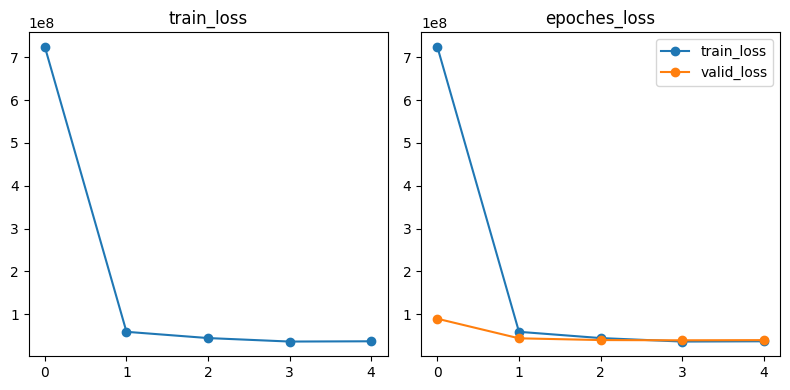

第 10/15 轮，训练损失: 31104453.1781，验证损失: 38262434.4110


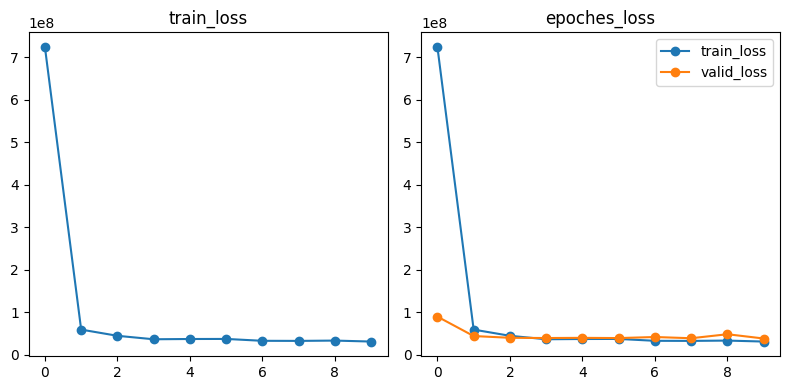

第 15/15 轮，训练损失: 21314515.8082，验证损失: 37439282.4110


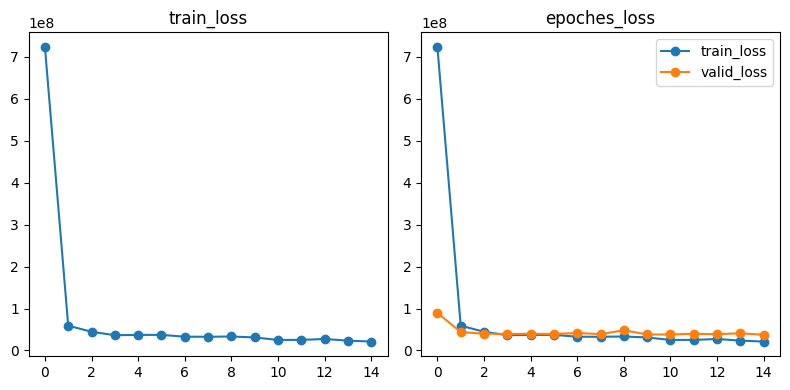

训练完成
模型保存在../result/Net.pth
进入预测模式
预测完成
预测结果已保存在../result/Net_submission.csv


In [307]:
if __name__ == '__main__':
    trainer(modelpath=args.modelpath)
    predictions = predictor(model=Net(),modelpath=args.modelpath)

    sample_submission = pd.read_csv('../data/sample_submission.csv')
    sample_submission.iloc[:,-1] = predictions
    save_path = '../result/Net_submission.csv'
    sample_submission.to_csv(save_path, index=False)
    print(f"预测结果已保存在{save_path}")